# Calculating validation measures for dictionary classifier

In [2]:
#Import libraries
import pandas as pd

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Inter rater reliability

In [221]:
#Get dataset of 500 character lines validated by both researchers to checj for inter rater reliability 
df_inter = pd.read_excel('inter_reliability.xlsx')

In [222]:
#Inter rater for topics 
from sklearn.metrics import cohen_kappa_score

fighting = cohen_kappa_score(df_inter['S_fight'],df_inter['V_fight'])
romance = cohen_kappa_score(df_inter['S_romance'],df_inter['V_romance'])
honor = cohen_kappa_score(df_inter['S_honor'],df_inter['V_honor'])
care = cohen_kappa_score(df_inter['S_care'],df_inter['V_care'])
print('Inter rater reliability for fighting:',fighting)
print('Inter rater reliability for romance:',romance)
print('Inter rater reliability for family honor:',honor)
print('Inter rater reliability for family care:',care)

Inter rater reliability for fighting: 0.9112005683163628
Inter rater reliability for romance: 0.7481108312342569
Inter rater reliability for family honor: 0.922069825436409
Inter rater reliability for family care: 0.773909111462808


In [223]:
#Inter rater general
df_gen = pd.read_excel('svsv.xlsx')
from sklearn.metrics import cohen_kappa_score

overall = cohen_kappa_score(df_gen['S_code'],df_gen['V_code'])
overall

0.8623348017621145

# Accuracy, recall and precision for our random subsample (sampled equally for era) 

In [3]:
#Get subsetted data of 1500 character lines manually validated to calculate validation measures 
df_sub = pd.read_excel('sum_sample_coded.xlsx')

In [4]:
df_sub = df_sub.fillna(0)

### Validation meassures for fighting

In [7]:

def fp_f (row):
    if row['C_fight']==0 and row['Fighting']==1:
        return 1
    else:
        return 0

def tn_f (row):
    if row['C_fight']==0:
        return 1
    else:
        return 0
def fn_f (row):
    if row['C_fight']==1 and row['Fighting']==1:
        return 1
    else:
        return 0
df_sub['tp_f'] = df_sub['C_fight']
df_sub['tn_f'] = df_sub.apply (lambda row: tn_f(row), axis=1)
df_sub['fp_f']= df_sub.apply (lambda row: fp_f(row), axis=1)
df_sub['fn_f']= df_sub.apply (lambda row: fn_f(row), axis=1)
tp_f = df_sub['tp_f'].sum()
fp_f = df_sub['fp_f'].sum()
tn_f = df_sub['tn_f'].sum()
fn_f = df_sub['fn_f'].sum()
precission_f = tp_f/(tp_f+fp_f)
recall_f = tp_f/(tp_f+fn_f)
accuracy_f = (tn_f+tp_f)/(tn_f+tp_f+fp_f+fn_f)
f_meassure_f = (2 * precission_f * recall_f) / (precission_f + recall_f)
print('Precission is:', precission_f)
print('Recall is:', recall_f)
print('F meassure is:', f_meassure_f)
print('Accuracy is:', accuracy_f)

Precission is: 0.8214285714285714
Recall is: 0.7796610169491526
F meassure is: 0.8
Accuracy is: 0.9848982271831911


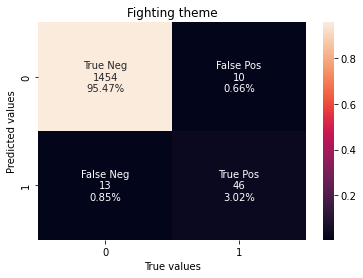

In [6]:
#Plot true positives, true negatives, false positives and false negatives in heat map 
cf_matrix = np.array([[1454,  10], [ 13, 46]]) # counts of tn, fp, fn and tp from before code 

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")
plt.title('Fighting theme')
plt.savefig('Validation for fighting.png', bbox_inches='tight')

### Validation meassures for romance

In [8]:
def fp_r (row):
    if row['C_romance']==0 and row['Romance']==1:
        return 1
    else:
        return 0

def tn_r (row):
    if row['C_romance']==0:
        return 1
    else:
        return 0
def fn_r (row):
    if row['C_romance']==1 and row['Romance']==1:
        return 1
    else:
        return 0
df_sub['tp_r'] = df_sub['C_romance']
df_sub['tn_r'] = df_sub.apply (lambda row: tn_r(row), axis=1)
df_sub['fp_r']= df_sub.apply (lambda row: fp_r(row), axis=1)
df_sub['fn_r']= df_sub.apply (lambda row: fn_r(row), axis=1)
tp_r = df_sub['tp_r'].sum()
fp_r = df_sub['fp_r'].sum()
tn_r = df_sub['tn_r'].sum()
fn_r = df_sub['fn_r'].sum()
precission_r = tp_r/(tp_r+fp_r)
recall_r = tp_r/(tp_r+fn_r)
accuracy_r = (tn_r+tp_r)/(tn_r+tp_r+fp_r+fn_r)
f_meassure_r = (2 * precission_r * recall_r) / (precission_r + recall_r)
print('Precission is:', precission_r)
print('Recall is:', recall_r)
print('F meassure is:', f_meassure_r)
print('Accuracy is:', accuracy_r)

Precission is: 0.5142857142857142
Recall is: 0.6206896551724138
F meassure is: 0.5625
Accuracy is: 0.981675392670157


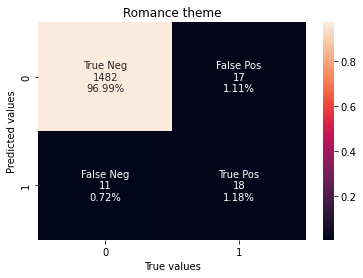

In [9]:
#Plot true positives, true negatives, false positives and false negatives in heat map 
cf_matrix = np.array([[1482,  17], [ 11, 18]]) # counts of tn, fp, fn and tp from before code 


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")
plt.title('Romance theme')
plt.savefig('Validation for Romance.png', bbox_inches='tight')

### Validation meassures for family care

In [10]:
def fp_c (row):
    if row['C_care']==0 and row['Care']==1:
        return 1
    else:
        return 0

def tn_c (row):
    if row['C_care']==0:
        return 1
    else:
        return 0
def fn_c (row):
    if row['C_care']==1 and row['Care']==1:
        return 1
    else:
        return 0
df_sub['tp_c'] = df_sub['C_care']
df_sub['tn_c'] = df_sub.apply (lambda row: tn_c(row), axis=1)
df_sub['fp_c']= df_sub.apply (lambda row: fp_c(row), axis=1)
df_sub['fn_c']= df_sub.apply (lambda row: fn_c(row), axis=1)
tp_c = df_sub['tp_c'].sum()
fp_c = df_sub['fp_c'].sum()
tn_c = df_sub['tn_c'].sum()
fn_c = df_sub['fn_c'].sum()
precission_c = tp_c/(tp_c+fp_c)
recall_c = tp_c/(tp_c+fn_c)
accuracy_c = (tn_c+tp_c)/(tn_c+tp_c+fp_c+fn_c)
f_meassure_c = (2 * precission_c * recall_c) / (precission_c + recall_c)
print('Precission is:', precission_c)
print('Recall is:', recall_c)
print('F meassure is:', f_meassure_c)
print('Accuracy is:', accuracy_c)

Precission is: 0.7111111111111111
Recall is: 0.8648648648648649
F meassure is: 0.7804878048780488
Accuracy is: 0.9881422924901185


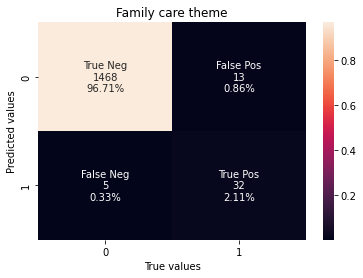

In [11]:
#Plot true positives, true negatives, false positives and false negatives in heat map 
cf_matrix = np.array([[1468,  13], [ 5, 32]]) # counts of tn, fp, fn and tp from before code 


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")
plt.title('Family care theme')
plt.savefig('Validation for Care.png', bbox_inches='tight')

### Validation meassures for family honor

In [12]:
def fp_h (row):
    if row['C_honor']==0 and row['Honor']==1:
        return 1
    else:
        return 0

def tn_h (row):
    if row['C_honor']==0:
        return 1
    else:
        return 0
def fn_h (row):
    if row['C_honor']==1 and row['Honor']==1:
        return 1
    else:
        return 0
df_sub['tp_h'] = df_sub['C_honor']
df_sub['tn_h'] = df_sub.apply (lambda row: tn_h(row), axis=1)
df_sub['fp_h']= df_sub.apply (lambda row: fp_h(row), axis=1)
df_sub['fn_h']= df_sub.apply (lambda row: fn_h(row), axis=1)
tp_h = df_sub['tp_h'].sum()
fp_h = df_sub['fp_h'].sum()
tn_h = df_sub['tn_h'].sum()
fn_h = df_sub['fn_h'].sum()
precission_h = tp_h/(tp_h+fp_h)
recall_h = tp_h/(tp_h+fn_h)
accuracy_h = (tn_h+tp_h)/(tn_h+tp_h+fp_h+fn_h)
f_meassure_h = (2 * precission_h * recall_h) / (precission_h + recall_h)
print('Precission is:', precission_h)
print('Recall is:', recall_h)
print('F meassure is:', f_meassure_h)
print('Accuracy is:', accuracy_h)

Precission is: 0.8125
Recall is: 0.8666666666666667
F meassure is: 0.8387096774193549
Accuracy is: 0.9966777408637874


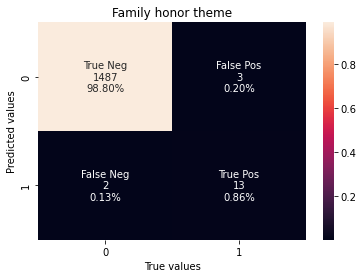

In [14]:
cf_matrix = np.array([[1487,  3], [ 2, 13]]) # indsæt dine couts her (true neg, false pos etc) ^


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")
plt.title('Family honor theme')
plt.savefig('Validation for Honor.png', bbox_inches='tight')

### Overall validation meassures

In [15]:
df_sub['over_all_tp'] = df_sub['tp_f']+df_sub['tp_r']+df_sub['tp_c']+df_sub['tp_h']
df_sub['over_all_tn'] = df_sub['tn_f']+df_sub['tn_r']+df_sub['tn_c']+df_sub['tn_h']
df_sub['over_all_fp']= df_sub['fp_f']+df_sub['fp_r']+df_sub['fp_c']+df_sub['fp_h']
df_sub['over_all_fn']= df_sub['fn_f']+df_sub['fn_r']+df_sub['fn_c']+df_sub['fn_h']
def tp (row):
    if row['over_all_tp']>0:
        return 1
    else:
        return 0
def tn (row):
    if row['over_all_tn']>0:
        return 1
    else:
        return 0
def fp (row):
    if row['over_all_fp']>0:
        return 1
    else:
        return 0
def fn (row):
    if row['over_all_fn']>0:
        return 1
    else:
        return 0
df_sub['over_all_tp'] = df_sub.apply (lambda row: tp(row), axis=1)
df_sub['over_all_tn'] = df_sub.apply (lambda row: tn(row), axis=1)
df_sub['over_all_fp']= df_sub.apply (lambda row: fp(row), axis=1)
df_sub['over_all_fn']= df_sub.apply (lambda row: fn(row), axis=1)
tp = df_sub['over_all_tp'].sum()
fp = df_sub['over_all_fp'].sum()
tn = df_sub['over_all_tn'].sum()
fn = df_sub['over_all_fn'].sum()

In [16]:
Overall_precision = (tp_f+tp_r+tp_h+tp_c)/((tp_f+tp_r+tp_h+tp_c)+(fp_f+fp_r+fp_h+fp_c))
Overall_recall = (tp_h+tp_c+tp_f+tp_r)/((tp_h+fn_h)+(tp_c+fn_c)+(tp_f+fn_f)+(tp_r+fn_r))
Overall_acc = ((tn_h+tp_h)+(tn_c+tp_c)+(tn_f+tp_f)+(tn_r+tp_r))/((tn_h+tp_h+fp_h+fn_h)+(tn_c+tp_c+fp_c+fn_c)+(tn_f+tp_f+fp_f+fn_f)+(tn_r+tp_r+fp_r+fn_r))
Overall_f= (2 * Overall_precision * Overall_recall) / (Overall_precision + Overall_recall)
print('Overall precission is:', Overall_precision)
print('Overall recall is:', recall_h)
print('Overall F meassure is:', Overall_f)
print('Overall Accuracy is:', Overall_acc)

Overall precission is: 0.7171052631578947
Overall recall is: 0.8666666666666667
Overall F meassure is: 0.7465753424657535
Overall Accuracy is: 0.9878169245966414


In [17]:
print('TN =', tn)
print('FP =', fp)
print('FN =', fn)
print('TP =', tp)

TN = 1500
FP = 43
FN = 31
TP = 104


Text(0.5, 15.0, 'True values')

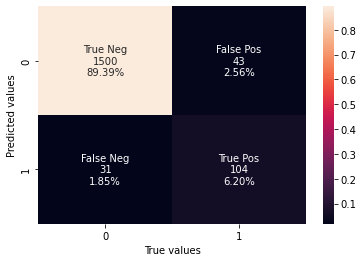

In [19]:
#Plotting over all true negatives, true positives, false negatives and false positives 

cf_matrix = np.array([[1500,  43], [ 31, 104]]) # indsæt dine couts her (true neg, false pos etc) ^


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")

# Precision for topics sampled - the 400 character lines samples to contain at least one topic to check for precission

In [20]:
df_topics = pd.read_excel('topic_sample_coded.xlsx')

In [21]:
#for fighting 
def fp_f (row):
    if row['C_Fighting']==0 and row['Fighting']==1:
        return 1
    else:
        return 0
df_topics['tp_f'] = df_topics['C_Fighting']
df_topics['fp_f']= df_topics.apply (lambda row: fp_f(row), axis=1)
tp_f1 = df_sub['tp_f'].sum()
fp_f1 = df_sub['fp_f'].sum()
precission_f = tp_f1/(tp_f1+fp_f1)
#For romance
def fp_r (row):
    if row['C_Romance']==0 and row['Romance']==1:
        return 1
    else:
        return 0
df_topics['tp_r'] = df_topics['C_Romance']
df_topics['fp_r']= df_topics.apply (lambda row: fp_r(row), axis=1)
tp_r1 = df_topics['tp_r'].sum()
fp_r1 = df_topics['fp_r'].sum()
precission_r = tp_r1/(tp_r1+fp_r1)
#For honor 
def fp_h (row):
    if row['C_Honor']==0 and row['Honor']==1:
        return 1
    else:
        return 0
df_topics['tp_h'] = df_topics['C_Honor']
df_topics['fp_h']= df_topics.apply (lambda row: fp_h(row), axis=1)
tp_h1 = df_topics['tp_h'].sum()
fp_h1 = df_topics['fp_h'].sum()
precission_h = tp_h1/(tp_h1+fp_h1)
#For care
def fp_c (row):
    if row['C_Care']==0 and row['Care']==1:
        return 1
    else:
        return 0
df_topics['tp_c'] = df_topics['C_Care']
df_topics['fp_c']= df_topics.apply (lambda row: fp_c(row), axis=1)
tp_c1 = df_topics['tp_c'].sum()
fp_c1 = df_topics['fp_c'].sum()
precission_c = tp_c1/(tp_c1+fp_c1)
print('Precission for fighting is:', precission_f)
print('Precission for romance is:', precission_r)
print('Precission for family honor is:', precission_h)
print('Precission for family care is:', precission_c)


Precission for fighting is: 0.8214285714285714
Precission for romance is: 0.6495726495726496
Precission for family honor is: 0.7522123893805309
Precission for family care is: 0.7350993377483444


### Over all precision score for the 400 subsampled character lines

In [22]:
precision_all = (tp_f1+tp_r1+tp_h1+tp_c1)/((tp_f1+tp_r1+tp_h1+tp_c1)+(fp_f1+fp_r1+fp_h1+fp_c1))
precision_all

0.7276887871853547

Text(0.5, 15.0, 'True values')

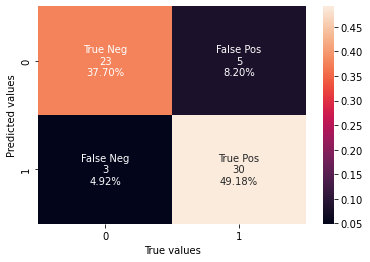

In [23]:
import pandas as pd

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = np.array([[23,  5], [ 3, 30]]) # indsæt dine couts her (true neg, false pos etc) ^


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = labels, fmt='')
plt.ylabel("Predicted values")
plt.xlabel("True values")